# Finance & Analytics Club

## MACD (Moving Average Convergence Divergence)

It is a trend following momentum indicator which is calculated by taking the difference of 2 exponential moving averages of an asset price (typically 26 period EMA and 12 period EMA).

A signal line is also calculated which is moving average of MACD line(typically 9 period) calculated in the above step.

The MACD line cutting the signal line from below signals a bullish period and the former cutting the latter from above signals a bearish period. This is called crossover strategy.

Many false-positives, expecially during sideways market.

This indicator is used in conjuction with other indicators.

More info at - "https://www.investopedia.com/terms/m/macd.asp"

Import necessary libraries


In [1]:
import pandas_datareader.data as pdr
import datetime as dt
import matplotlib.pyplot as plt

Download historical data for required stocks

In [2]:
ticker = "RELIANCE.NS"
ohlcv = pdr.get_data_yahoo(ticker,dt.date.today()-dt.timedelta(10000),dt.date.today())

In [3]:
ohlcv

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1996-01-01,16.095699,15.904300,16.009800,16.068300,47600787.0,2.431136
1996-01-02,16.107401,15.826200,16.029301,15.943400,77143764.0,2.412238
1996-01-03,16.943001,16.029301,16.205000,16.064400,95695836.0,2.430546
1996-01-04,15.962900,15.701300,15.912100,15.916000,99159504.0,2.408093
1996-01-05,15.853600,15.670000,15.853600,15.806700,76213503.0,2.391556
...,...,...,...,...,...,...
2020-06-22,1804.199951,1735.000000,1773.400024,1746.150024,27781693.0,1746.150024
2020-06-23,1763.750000,1716.099976,1750.000000,1720.900024,17519493.0,1720.900024
2020-06-24,1772.699951,1711.699951,1735.900024,1727.849976,23807033.0,1727.849976


#### Function to calculate MACD typical values a = 12; b =26, c =9

In [4]:
def MACD(DF,a,b,c):
    df = DF.copy()
    df["MA_Fast"]=df["Adj Close"].ewm(span=a,min_periods=a).mean() # ewm is Exponential Moving Average 
    df["MA_Slow"]=df["Adj Close"].ewm(span=b,min_periods=b).mean()
    df["MACD"]=df["MA_Fast"]-df["MA_Slow"]
    df["Signal"]=df["MACD"].ewm(span=c,min_periods=c).mean()
    df.dropna(inplace=True)
    return df

In [5]:
df = MACD(ohlcv, 12, 26, 9)

In [6]:
df.tail(100) # shows last 100 data points in our dataframe

,High,Low,Open,Close,Volume,Adj Close,MA_Fast,MA_Slow,MACD,Signal
Date,,,,,,,,,,
2020-01-29,1494.400024,1464.050049,1474.050049,1479.849976,11313297.0,1479.849976,1514.696667,1525.544362,-10.847695,-3.965191
2020-01-30,1479.699951,1440.000000,1479.000000,1443.750000,10241756.0,1443.750000,1503.781795,1519.485520,-15.703725,-6.312898
2020-01-31,1453.250000,1407.199951,1453.000000,1411.650024,15886673.0,1411.650024,1489.607677,1511.497706,-21.890029,-9.428324
2020-02-03,1399.949951,1363.050049,1369.900024,1385.500000,14040626.0,1385.500000,1473.591111,1502.164542,-28.573431,-13.257346
2020-02-04,1432.500000,1397.800049,1400.000000,1426.400024,11604666.0,1426.400024,1466.330944,1496.552356,-30.221412,-16.650159
...,...,...,...,...,...,...,...,...,...,...
2020-06-22,1804.199951,1735.000000,1773.400024,1746.150024,27781693.0,1746.150024,1631.052703,1559.361395,71.691308,57.633228
2020-06-23,1763.750000,1716.099976,1750.000000,1720.900024,17519493.0,1720.900024,1644.875368,1571.327219,73.548148,60.816212
2020-06-24,1772.699951,1711.699951,1735.900024,1727.849976,23807033.0,1727.849976,1657.640692,1582.921497,74.719195,63.596808


/Users/subhamgupta/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Volume')

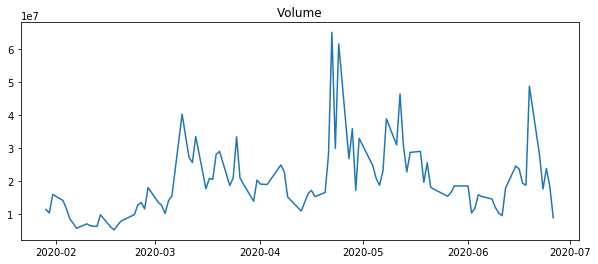

In [7]:
plt.figure(figsize = (10,4))
plt.plot(df.iloc[-100:,4].index, df.iloc[-100:,4].values)
plt.title('Volume')

Text(0.5, 1.0, 'Adjusted Close Price')

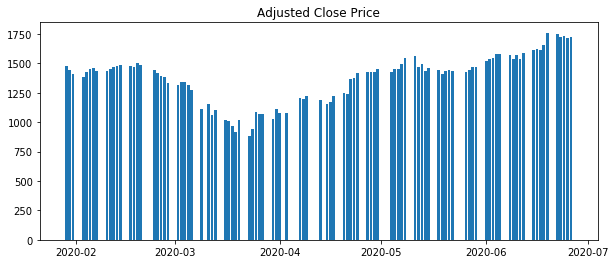

In [8]:
plt.figure(figsize = (10,4))
plt.bar(df.iloc[-100:,5].index, df.iloc[-100:,5].values)
plt.title('Adjusted Close Price')

## Finally the MACD graph

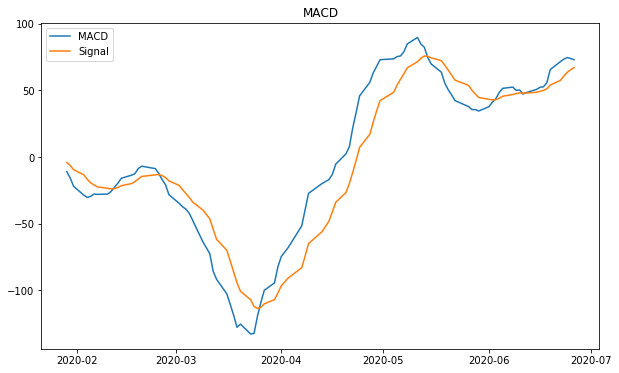

In [9]:
plt.figure(figsize = (10,6))
plt.plot(df.iloc[-100:,[-2,-1]])
plt.title('MACD')
plt.legend(('MACD','Signal'),loc='best')

plt.show()

#### you can clearly see that initially there werea lot of false positives. 